<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Сбалансирование-веса-классов" data-toc-modified-id="Сбалансирование-веса-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сбалансирование веса классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога-вероятности" data-toc-modified-id="Изменение-порога-вероятности-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога вероятности</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

Импортируем библиотеки.

In [6]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_auc_score, f1_score, roc_curve,
                             precision_recall_fscore_support)

Сохраним данные из файла CSV в переменную data и посмотрим на общую информацию о датасете.

In [7]:
data = pd.read_csv('\datasets\Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Данные в первых трех столбцах *RowNumber*, *CustomerId* и *Surname* не могут влиять на решения клиента. *RowNumber* - дублирует индекс строки, *CustomerId* представляет идентификационный номер клиента и *Surname* - фамилию клиента.
Проверим наличие дубликатов объектов.

In [9]:
data.duplicated().sum()

0

Данные в *Geography* и *Gender* представлены типом object. Рассмотрим их подробнее.

In [10]:
print(data['Gender'].value_counts(),
      data['Geography'].value_counts(),
      sep='\n\n')

Male      5457
Female    4543
Name: Gender, dtype: int64

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Также в столбце *Tenure* имеются пропущенные значения. От пропусков необходимо будет избавиться.

In [11]:
data['Tenure'].fillna(-1, inplace=True)

Выделим из датасета целевой признак *Exited* и избавимся от лишних данных.

In [12]:
features = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
target = data['Exited']

Исследуем зависимость признаков друг от друга. Составим матрицу корреляции признаков.

In [13]:
features.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.003552,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.006315,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.003552,-0.006315,1.000000,-0.005400,0.009661,0.020132,-0.024462,0.011174
Balance,0.006268,0.028308,-0.005400,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.009661,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.020132,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.024462,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.011174,0.012797,0.014204,-0.009933,-0.011421,1.000000


Сильная корреляция признаков отсутствует.

Воспользуемся техникой прямого кодирования One-Hot Encoding (OHE). Преобразуем категориальные признаки в числовые и кодируем признак *Tenure*.

In [14]:
features = pd.get_dummies(features,
                          drop_first=True,
                          columns=['Tenure', 'Gender', 'Geography'])

In [15]:
print('features:', features.shape, '\ntarget:', target.shape)

features: (10000, 21) 
target: (10000,)


In [16]:
features.head()

,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Tenure_0.0,Tenure_1.0,Tenure_2.0,...,Tenure_4.0,Tenure_5.0,Tenure_6.0,Tenure_7.0,Tenure_8.0,Tenure_9.0,Tenure_10.0,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,0.00,1,1,1,101348.88,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,608,41,83807.86,1,0,1,112542.58,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,502,42,159660.80,3,1,0,113931.57,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,850,43,125510.82,1,1,1,79084.10,0,0,1,...,0,0,0,0,0,0,0,0,0,1


Число признаков увеличилось до 21. Разделим датасет на обучающую, валидационную и тестовую выборки в соотношении 6-2-2.

In [17]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.4, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_test, target_test, test_size=0.5, random_state=12345)

Масштабируем численные данные методом стандартизации. 

In [18]:
scaler = StandardScaler()
scaler.fit(features_train)

StandardScaler()

In [19]:
pd.options.mode.chained_assignment = None

features_train[:] = scaler.transform(features_train[:])
features_valid[:] = scaler.transform(features_valid[:])
features_test[:] = scaler.transform(features_test[:]) 

In [20]:
print('Shapes\nTraining set: {}\nTesting set: {}\nValidation set: {}'
      .format(features_train.shape, features_test.shape, features_valid.shape))

Shapes
Training set: (6000, 21)
Testing set: (2000, 21)
Validation set: (2000, 21)


Данные были правильно разделены в соотношении 6-2-2. Провели кодировку категориальных признаков и стандартизацию численных признаков. Данные подготовлены для обучения моделей.

## Исследование задачи

Целевой признак - *Exited*, который может принимать значения 1 или 0, что отражает факт ухода клиента из банка. Перед нами задача бинарной классификации. Проверим насколько сбалансированы классы в выборке.

In [21]:
target_train.value_counts(normalize=True)

0    0.800667
1    0.199333
Name: Exited, dtype: float64

Соотношение классов 2-8. Классы не являются сбалансированными. Обучим модели на несбалансированной выборке и получим метрики таких моделей. В качестве алгоритмов обучения используем Random Forest Classifier и Logistic Regression. На несбалансированной выборке будем использовать метрику F1, как определяющую качество модели.

Подберем для алгоритма Random Forest гиперпараметры для количества оценщиков и глубины деревьев.

In [22]:
best_f1 = 0
f1_results = {}

for est in range(10, 81, 10):
    for depth in range(4, 25, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        
        probabilities = model.predict_proba(features_valid)[:, 1]

        f1 = f1_score(target_valid, model.predict(features_valid))
        auc_roc = roc_auc_score(target_valid, probabilities)

        if f1 > best_f1:
            best_f1 = f1
            auc_roc = auc_roc
            forest_model = model
            best_est = est
            best_depth = depth

f1_results['Train'] = best_f1
print('RandomForestClassifier\nF1 лучшей модели:', best_f1, '\nAUC-ROC лучшей модели:', auc_roc,
      '\nГлубина деревьев:', best_depth, '\nКоличество оценщиков:', best_est)

RandomForestClassifier
F1 лучшей модели: 0.5972850678733032 
AUC-ROC лучшей модели: 0.8402490034418308 
Глубина деревьев: 18 
Количество оценщиков: 50


Получим результат для модели с алгоритмом обучения Logistic Regression.

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features_train, target_train)
    
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, model.predict(features_valid))
    auc_roc = roc_auc_score(target_valid, probabilities)

print('LogisticRegression\nF1:', f1, '\nAUC-ROC:', auc_roc)

LogisticRegression
F1: 0.32830820770519265 
AUC-ROC: 0.7598067977667418


Метрика F1 лучше у модели с алгоритмом Random Forest с гиперпараметрами количество оценщиков 50 и глубиной деревьев 18.

In [24]:
forest_model

RandomForestClassifier(max_depth=18, n_estimators=50, random_state=12345)

Сведем метрики в одну таблицу и построим матрицу ошибок для этой модели.

In [25]:
def confusion_heatmap(features, target, model, threshold=0.5):
    probabilities = model.predict_proba(features)[:, 1]
    predictions = probabilities > threshold
    
    # confusion matrix
    confusion_data = pd.DataFrame(columns=np.unique(target), 
                                  index=np.unique(predictions), 
                                  data=confusion_matrix(target, predictions))
    
    # plot heatmap of confusion matrix
    sns.heatmap(confusion_data,
                linewidths=.5, 
                cmap='Blues', 
                annot=True, 
                fmt='2.0f', 
                center=len(target) / 10, 
                annot_kws={'fontsize':15})
    plt.xlabel('predictions')
    plt.ylabel('targets')
    
    # print metrics 
    metrics = list(precision_recall_fscore_support(target, predictions, average='binary'))[:3]
    metrics.append(accuracy_score(target, predictions))
    metrics.append(roc_auc_score(target, probabilities))
    print('{:.4f} - Precision\n{:.4f} - Recall\n{:.4f} - F1\n{:.4f} - Accuracy\n{:.4f} - AUC-ROC'.format(*metrics))

RandomForest
0.8082 - Precision
0.4737 - Recall
0.5973 - F1
0.8665 - Accuracy
0.8442 - AUC-ROC


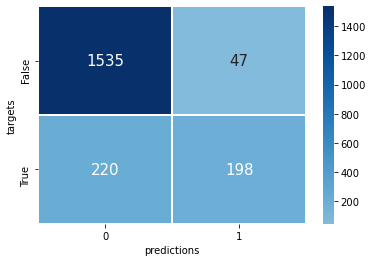

In [26]:
print('RandomForest')
confusion_heatmap(features_valid, target_valid, forest_model)

### Вывод

Мы получили модель, обученную алгоритмом Random Forest, с метрикой F1 на валидационной выборке равной 0.597. Метрика Recall является все еще очень низкой, это означает, что доля истинно положительных ответов меньше доли ложноотрицательных. Модель плохо предсказывает положительные исходы. Причиной является дисбаланс классов в обучающей выборке. Далее воспользуемся рядом методов, позволяющих избавиться от этой проблемы.

## Борьба с дисбалансом

### Сбалансирование веса классов

При обучении модели в параметрах алгоритма можно задать сбалансированный вес класса. Алгоритм будет задавть вес класса пропорционально частоте его появления.

In [27]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
    model.fit(features_train, target_train)
    
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, model.predict(features_valid))
    auc_roc = roc_auc_score(target_valid, probabilities)

print('LogisticRegression\nF1:', f1, '\nAUC-ROC:', auc_roc)

LogisticRegression
F1: 0.4883920894239037 
AUC-ROC: 0.764208893109685


Сбалансирование веса увеличило F1 модели Logistic Regression до 0.488.

Попробуем обучить модель Random Forest.

In [28]:
model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=18, class_weight='balanced')
model.fit(features_train, target_train)
f1_results['Classweighted'] = f1_score(target_valid, model.predict(features_valid))

RandomForest classweighted
0.7912 - Precision
0.4713 - Recall
0.5907 - F1
0.8635 - Accuracy
0.8414 - AUC-ROC


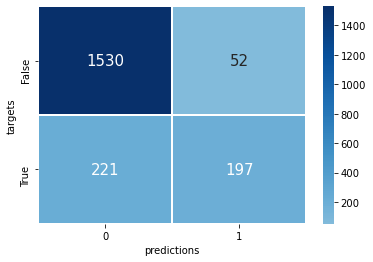

In [29]:
print('RandomForest classweighted')
confusion_heatmap(features_valid, target_valid, model)

Мы не получили значимых изменений в предсказании.

### Увеличение выборки

Чтобы сбалансировать классы в обучающей выборке - увеличим число строк с положительным классом.

In [30]:
def upsample(features, target, repeat):
    # split features and target by class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # increase the number of rows class one by *repeat* times 
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    # shuffle features and target
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [31]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print('Upsampled Training Set\nFeatures:', features_upsampled.shape, '\nTarget:', target_upsampled.shape)

Upsampled Training Set
Features: (9588, 21) 
Target: (9588,)


In [32]:
target_upsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

Обучающая выборка выросла более чем в половину, а соотношение классов стало практически равным 1-1. Подберем параметры для Random Forest заново и определим метрики наилучшего алгоритма. За основную метрику будем считать F1.

In [33]:
best_f1 = 0

for est in range(10, 81, 10):
    for depth in range (4, 25, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        
        probabilities = model.predict_proba(features_valid)[:, 1]

        f1 = f1_score(target_valid, model.predict(features_valid))
        auc_roc = roc_auc_score(target_valid, probabilities)

        if f1 > best_f1:
            best_f1 = f1
            roc_score = auc_roc
            forest_model_upsampled = model
            best_est = est
            best_depth = depth
            
f1_results['Upsampled'] = best_f1
print('RandomForestClassifier\nF1 лучшей модели:', best_f1, '\nAUC-ROC лучшей модели:', roc_score,
      '\nГлубина деревьев:', best_depth, '\nКоличество оценщиков:', best_est)

RandomForestClassifier
F1 лучшей модели: 0.6347177848775293 
AUC-ROC лучшей модели: 0.848972289936426 
Глубина деревьев: 10 
Количество оценщиков: 20


F1 модели, обученной на увеличенной выборке, вырос до 0.635, это хороший результат. Метрика AUC-ROC также показывает высокие значения.

In [34]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features_upsampled, target_upsampled)
    
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, model.predict(features_valid))
    auc_roc = roc_auc_score(target_valid, probabilities)

print('LogisticRegression\nF1 модели:', f1, '\nAUC-ROC лучшей модели:', auc_roc)

LogisticRegression
F1 модели: 0.49007765314926655 
AUC-ROC лучшей модели: 0.7642013319703119


Модель, обученная алгоритмом Logistic Regression, увеличила метрику F1 до 0.49. Но для поставленной задачи это слишком мало.

Посмотрим на метрики и матрицу ошибок модели Random Forest.

RandomForest upsampled
0.5720 - Precision
0.7129 - Recall
0.6347 - F1
0.8285 - Accuracy
0.8490 - AUC-ROC


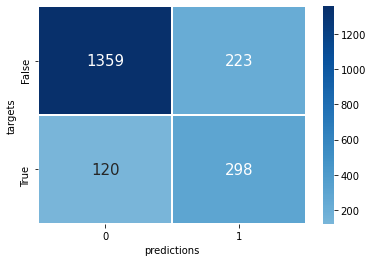

In [35]:
print('RandomForest upsampled')
confusion_heatmap(features_valid, target_valid, forest_model_upsampled)

Выросла метрика F1, также сильно выросла полнота предсказаний. Модели правильно предсказывает больше 2/3 положительных результатов. Вместе с ростом полноты мы можем наблюдать падение точности предсказания, а именно немногим меньше половины положительных предсказаний оказались ложными.

### Уменьшение выборки

Для балансировки классов применим другой метод - уменьшения выборки. Уменьшим в обучающей выборке количество строк с классом 0.

In [36]:
def downsample(features, target, fraction):
    # split features and target by class
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    # decrease the number of rows class zero by *fraction* times 
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    # shuffle features and target
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [37]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
print('Downsampled Training Set\nFeatures:', features_downsampled.shape, '\nTarget:', target_downsampled.shape)

Downsampled Training Set
Features: (2397, 21) 
Target: (2397,)


In [38]:
target_downsampled.value_counts(normalize=True)

0    0.501043
1    0.498957
Name: Exited, dtype: float64

Число объектов в обучающей выборке уменьшилось более чем вдвое - 2397, но классы оказались сбалансированны. Обучим модели на новых данных.

In [39]:
best_f1 = 0

for est in range(10, 81, 10):
    for depth in range (4, 25, 2):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        
        probabilities = model.predict_proba(features_valid)[:, 1]

        f1 = f1_score(target_valid, model.predict(features_valid))
        auc_roc = roc_auc_score(target_valid, probabilities)

        if f1 > best_f1:
            best_f1 = f1
            auc_roc = auc_roc
            forest_model_downsampled = model
            best_est = est
            best_depth = depth
            
f1_results['Downsampled'] = best_f1
print('RandomForestClassifier\nF1 лучшей модели:', best_f1, '\nAUC-ROC лучшей модели:', auc_roc,
      '\nГлубина деревьев:', best_depth, '\nКоличество оценщиков:', best_est)

RandomForestClassifier
F1 лучшей модели: 0.6024785510009533 
AUC-ROC лучшей модели: 0.8444567775028884 
Глубина деревьев: 8 
Количество оценщиков: 80


Обучим модели Logistic Regression.

In [40]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    model = LogisticRegression(random_state=12345, solver='liblinear')
    model.fit(features_downsampled, target_downsampled)
    
    probabilities = model.predict_proba(features_valid)[:, 1]
    
    f1 = f1_score(target_valid, model.predict(features_valid))
    auc_roc = roc_auc_score(target_valid, probabilities)

print('LogisticRegression\nF1 модели:', f1, '\nAUC-ROC лучшей модели:', auc_roc)

LogisticRegression
F1 модели: 0.4819897084048027 
AUC-ROC лучшей модели: 0.7620448950211411


При обучении на уменьшенной выборке метрики F1 оказались немного ниже, чем на увеличенной. Logistic Regression дает результаты худшие, чем Random Forest и хуже, чем заявленно в требованиях. Далее мы будем работать с алгоритмом Random Forest. Посмотрим метрики и матрицу ошибок для модели Random Forest.

RandomForest downsampled
0.5008 - Precision
0.7560 - Recall
0.6025 - F1
0.7915 - Accuracy
0.8464 - AUC-ROC


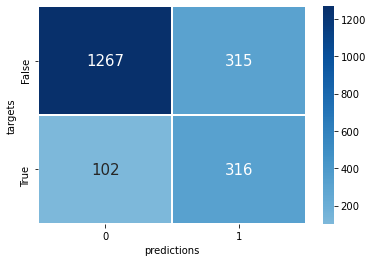

In [41]:
print('RandomForest downsampled')
confusion_heatmap(features_valid, target_valid, forest_model_downsampled)

Метрика F1 стала меньше - 0.6, но полнота предсказаний увеличилась.

На уменьшенной выборке модель смогла предсказать еще большую долю клиентов, которые покинули банк, но достигла этого ценой увеличения ложных срабатываний. С точки зрения бизнеса такая модель может оказаться полезнее, так как сохранит большее количество клиентов для банка. В то же время банку придется потрать больше ресурсов на удержание клиентов, так как модель чаще предсказывает уход клиента. Так как за основную метрику мы приняли F1, то на ее основе можно сделать вывод, что метод увеличения выборки дал лучший результат. Будем использовать этот метод для дальнейшего обучения моделей.

### Изменение порога вероятности

Попробуем изменить порог вероятности положительного класса и посмотрим как разные варианты влияют на метрики модели. За алгорит обучения принимаем Random Forest, с гиперпараметрами, полученными при обучении с увеличенной выборке. Обучать модель будем на увеличенной выборке. Порог вероятности будем изменять от 0.4 до 0.7.

In [42]:
model = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=10)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)[:, 1]

for threshold in np.arange(0.4, 0.7, 0.02):
    predicted_valid = probabilities_valid > threshold
    metrics = tuple(precision_recall_fscore_support(target_valid, predicted_valid, average='binary'))[:3]

    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.5f}".format(
        threshold, *metrics))

Threshold = 0.40 | Precision = 0.446, Recall = 0.794, F1 = 0.57143
Threshold = 0.42 | Precision = 0.470, Recall = 0.778, F1 = 0.58559
Threshold = 0.44 | Precision = 0.499, Recall = 0.761, F1 = 0.60284
Threshold = 0.46 | Precision = 0.515, Recall = 0.737, F1 = 0.60630
Threshold = 0.48 | Precision = 0.546, Recall = 0.727, F1 = 0.62359
Threshold = 0.50 | Precision = 0.572, Recall = 0.713, F1 = 0.63472
Threshold = 0.52 | Precision = 0.596, Recall = 0.689, F1 = 0.63929
Threshold = 0.54 | Precision = 0.616, Recall = 0.660, F1 = 0.63741
Threshold = 0.56 | Precision = 0.629, Recall = 0.624, F1 = 0.62665
Threshold = 0.58 | Precision = 0.651, Recall = 0.603, F1 = 0.62609
Threshold = 0.60 | Precision = 0.661, Recall = 0.579, F1 = 0.61735
Threshold = 0.62 | Precision = 0.682, Recall = 0.548, F1 = 0.60743
Threshold = 0.64 | Precision = 0.706, Recall = 0.524, F1 = 0.60165
Threshold = 0.66 | Precision = 0.731, Recall = 0.495, F1 = 0.59058
Threshold = 0.68 | Precision = 0.741, Recall = 0.471, F1 = 0.5

Максимальная F1 равна 0.639, приходится на порог 0.52.

Построим график ошибок модели, отметим на ней кривую для случайной модели.

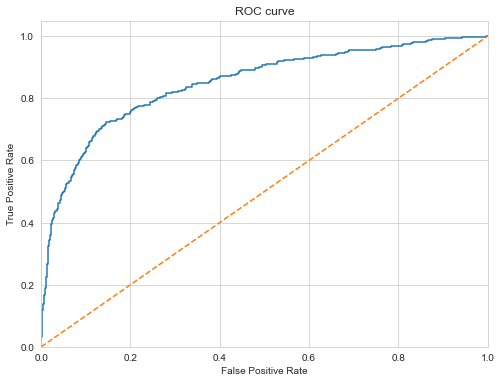

In [43]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_valid)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

AUC-ROC модели на увеличенной выборке равен 0.849, максимальная F1 равна 0.639, при пороге положительной вероятности 0.52. Полученная модель имеет хорошие предсказательные качества. Исследуем модель на тестовой выборке.

### Вывод

Для сбалансирования классов в обучающей выборке были использованы несколько разных методов. Хороший результат показал метод увеличения выборки, метрика F1 равна 0.635. Методом варьирования порога вероятности положительного исхода метрика F1 на валидационной выборке была еще увеличена до 0.639. Метрика AUC-ROC модели показывает высокий результат. Выбранные параметры будем использовать в исследовании модели на тестовой выборке.

## Тестирование модели

Объединим обучающую и валидационную выборки.

In [44]:
features_train_valid = pd.concat([features_train] + [features_valid])
target_train_valid = pd.concat([target_train] + [target_valid])

Сбалансируем классы методом увеличесния выборки.

In [45]:
features_upsampled, target_upsampled = upsample(features_train_valid, target_train_valid, 4)

In [46]:
print('Training and Valid Set\nFeatures:', features_upsampled.shape, '\nTarget:', target_upsampled.shape)

Training and Valid Set
Features: (12842, 21) 
Target: (12842,)


In [47]:
target_upsampled.value_counts(normalize=True)

1    0.502725
0    0.497275
Name: Exited, dtype: float64

Размер обучающей выборки увеличился до 12842 объектов, классы сбалансированы. Обучим модель Random Forest на объединенных данных.

In [48]:
model.fit(features_upsampled, target_upsampled)
f1_results['Test'] = f1_score(target_test, model.predict(features_test))

Получим предсказания модели на тестовых данных. Зададим порог вероятности равным 0.52. Построим график ошибок, матрицу ошибок и основные метрики.

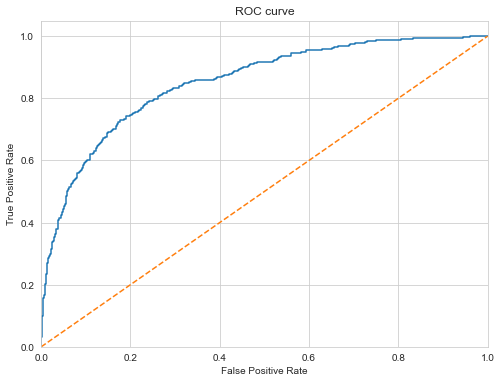

In [49]:
probabilities_test = model.predict_proba(features_test)[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_test)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

RandomForest upsampled, Test set
0.5796 - Precision
0.6454 - Recall
0.6107 - F1
0.8260 - Accuracy
0.8513 - AUC-ROC


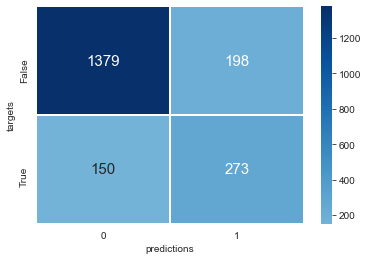

In [50]:
print('RandomForest upsampled, Test set')
confusion_heatmap(features_test, target_test, model, threshold=0.52)

На тестовой выборке получили метрику F1 равную 0.611, этот результат выше 0.59 указанного в задании. Высокое значение метрики AUC-ROC подтверждает качество модели. В результате проведенной работы получили модель способную эффективно предсказывать отток клиентов из банка.

Соберем результаты F1 метрики для всех обученных моделей RandomForest b построим диаграмму.

In [51]:
dict_results = {}
dict_results['class'] = list(f1_results.keys())
dict_results['f1_metric'] = list(f1_results.values())
df_results = pd.DataFrame.from_dict(dict_results, orient='columns')

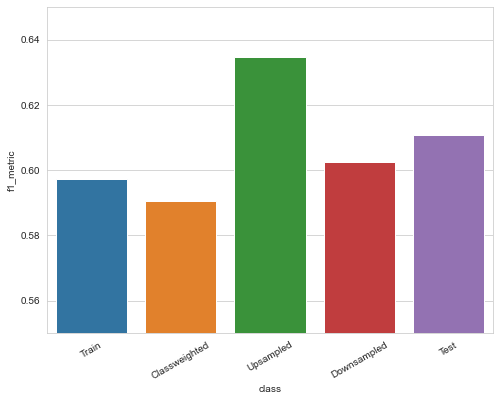

In [52]:
plt.figure(figsize=(8, 6))
g = sns.barplot(y="f1_metric", x="class", data=df_results)
plt.xticks(rotation=30)
_ = g.set(ylim=(0.55, 0.65))

Составим таблицу важности признаков в полученной модели. 

In [53]:
importance = model.feature_importances_.tolist()
features_list = features_upsampled.columns.tolist()

features_importance = pd.DataFrame({'feature':features_list, 'importance':importance}).sort_values(
    by='importance', ascending=False).reset_index(drop=True)

Посмотрим на признаки важность которых более 1% и построим диаграмму важности признаков.

In [54]:
features_importance[features_importance['importance'] > 0.01]

,feature,importance
0,Age,0.350875
1,NumOfProducts,0.231487
2,Balance,0.092617
3,IsActiveMember,0.066972
4,EstimatedSalary,0.058455
5,Geography_Germany,0.057294
6,CreditScore,0.057175
7,Gender_Male,0.026238


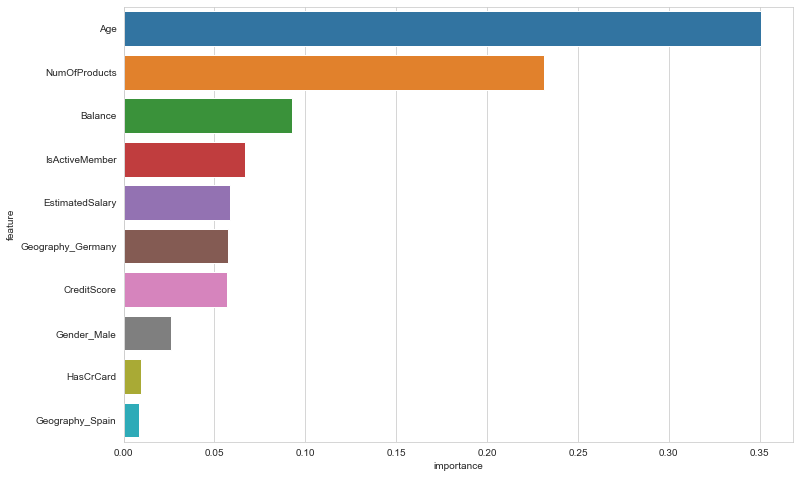

In [55]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(y="feature", x="importance", data=features_importance[:10])

Наиболее влиятельными признаками оказались *возраст* и *количество продуктов*, в совокупности имеют более 58%.